In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

import os
import glob

from nfl import Team, Game, Play, Player

In [2]:
games = pd.read_csv('data/games.csv')

In [3]:
players = pd.read_csv('data/players.csv').set_index('nflId')

In [4]:
plays = pd.read_csv('data/plays.csv')

In [5]:
weeks = {}
for i in range(1):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join('data',name+'-processed.csv'))

In [6]:
team_names = games['homeTeamAbbr'].unique()

In [7]:
teams = {}
for name in team_names:
    teams[name] = Team(abbr=name)

In [8]:
for i in range(games.shape[0]):
    _game_info = games.loc[i]
    gameId = _game_info['gameId']
    homeTeamAbbr = _game_info['homeTeamAbbr']
    visitorTeamAbbr = _game_info['visitorTeamAbbr']
    week = _game_info['week']
    
    game_plays = plays[plays['gameId'] == gameId]
    home_game_plays = game_plays[game_plays['possessionTeam']==homeTeamAbbr].sort_values(by=['playId']).reset_index(drop=True)
    away_game_plays = game_plays[game_plays['possessionTeam']==visitorTeamAbbr].sort_values(by=['playId']).reset_index(drop=True)
    
    teams[homeTeamAbbr].games[f'week{week}'] = Game(gameId,opponent=visitorTeamAbbr,game_info=_game_info,
                                                    play_data=away_game_plays,location='home')
    teams[visitorTeamAbbr].games[f'week{week}'] = Game(gameId,opponent=homeTeamAbbr,game_info=_game_info,
                                                    play_data=home_game_plays,location='away')

In [9]:
team = teams['NYG']

In [10]:
for key in ('week1',):
    game = team.games[key]
    
    week_data = weeks[key]
    
    for i in game.play_data.index:
        play = game.play_data.loc[i]
        tracking_data = week_data[(week_data['gameId']==play['gameId'])&(week_data['playId']==play['playId'])]
        player_tracking = tracking_data[tracking_data['nflId'].notna()]
        fb_tracking = tracking_data[tracking_data['displayName']=='Football'].sort_values(by='frameId').reset_index(drop=True)
        
        game.plays.append(Play(play['playId'],play_data=play,player_tracking=player_tracking,
                               fb_tracking=fb_tracking,defensive_team=game.location))

In [11]:
game = team.games['week1']

In [12]:
game.opponent

'JAX'

In [13]:
game.location

'home'

In [14]:
game.nPlays

34

In [15]:
game.list_plays()

Play 0: (14:19) (Shotgun) B.Bortles pass deep left to K.Cole to 50 for 31 yards (J.Jenkins).
Play 1: (11:42) (Shotgun) B.Bortles pass incomplete short right to D.Westbrook.
Play 2: (11:36) (Shotgun) B.Bortles pass short right to D.Westbrook to NYG 23 for 6 yards (E.Apple) [C.Barwin]. Penalty on NYG-R.Armstrong, Defensive Offside, declined.
Play 3: (10:27) (Shotgun) B.Bortles pass incomplete short left to T.Yeldon.
Play 4: (10:22) (Shotgun) B.Bortles pass incomplete deep right to D.Moncrief (E.Apple).
Play 5: (7:04) B.Bortles pass short right to L.Fournette ran ob at JAX 46 for 11 yards (A.Ogletree).
Play 6: (6:31) (Shotgun) B.Bortles sacked at JAX 38 for -8 yards (sack split by K.Wynn and B.Goodson).
Play 7: (5:47) (Shotgun) B.Bortles pass deep left intended for D.Moncrief INTERCEPTED by J.Jenkins at NYG 37. J.Jenkins ran ob at NYG 37 for no gain.
Play 8: (13:02) (Shotgun) B.Bortles pass short middle to T.Yeldon to NYG 49 for 7 yards (K.Wynn, R.Armstrong).
Play 9: (12:32) (Shotgun) B.B

In [16]:
play_number = 0

In [17]:
play = game.plays[play_number]

In [18]:
print(play)

(14:19) (Shotgun) B.Bortles pass deep left to K.Cole to 50 for 31 yards (J.Jenkins).


In [19]:
play.play_data

gameId                                                           2018090907
playId                                                                   79
playDescription           (14:19) (Shotgun) B.Bortles pass deep left to ...
quarter                                                                   1
down                                                                      2
yardsToGo                                                                11
possessionTeam                                                          JAX
playType                                                     play_type_pass
yardlineSide                                                            JAX
yardlineNumber                                                           19
offenseFormation                                                    SHOTGUN
personnelO                                                 1 RB, 1 TE, 3 WR
defendersInTheBox                                                         7
numberOfPass

In [20]:
play.process_players(players)

In [21]:
play.events

{'ball_snap': 11,
 'pass_forward': 37,
 'pass_arrived': 55,
 'pass_outcome_caught': 58,
 'tackle': 61}

In [22]:
play.outcome_event

'pass_outcome_caught'

In [23]:
for key, value in play.players['offense'].items():
    if value.position == 'QB':
        qb_key = key

In [24]:
play.players['offense'][qb_key].name

'Blake Bortles'

In [25]:
play.players['offense'][qb_key].position

'QB'

In [26]:
state = play.players['offense'][qb_key].tracking_data[['x','y','s','a']]

In [27]:
play.players['offense'][qb_key].tracking_data['x'].values

array([24.64, 24.64, 24.65, 24.65, 24.65, 24.66, 24.65, 24.64, 24.63,
       24.63, 24.61, 24.59, 24.57, 24.51, 24.41, 24.27, 24.09, 23.87,
       23.63, 23.37, 23.1 , 22.82, 22.56, 22.32, 22.1 , 21.91, 21.74,
       21.62, 21.52, 21.46, 21.42, 21.41, 21.42, 21.45, 21.49, 21.53,
       21.58, 21.63, 21.67, 21.69, 21.69, 21.69, 21.66, 21.62, 21.55,
       21.46, 21.36, 21.24, 21.12, 20.99, 20.86, 20.72, 20.58, 20.46,
       20.34, 20.23, 20.13, 20.05, 19.99, 19.95, 19.94, 19.96])

In [28]:
state.T

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
x,24.640000,24.640000,24.650000,24.650000,24.650000,24.660000,24.650000,24.640000,24.630000,24.630000,...,20.580000,20.460000,20.340000,20.230000,20.130000,20.050000,19.990000,19.950000,19.940000,19.960000
y,29.453333,29.463333,29.473333,29.473333,29.473333,29.473333,29.483333,29.483333,29.483333,29.493333,...,31.033333,31.233333,31.443333,31.683333,31.943333,32.213333,32.513333,32.833333,33.163333,33.513333
s,0.070000,0.060000,0.050000,0.050000,0.040000,0.040000,0.030000,0.030000,0.020000,0.020000,...,2.260000,2.330000,2.490000,2.650000,2.800000,2.940000,3.110000,3.250000,3.400000,3.530000
a,0.070000,0.070000,0.060000,0.050000,0.050000,0.040000,0.040000,0.030000,0.030000,0.020000,...,1.280000,1.190000,1.350000,1.610000,1.980000,2.020000,2.300000,2.110000,2.140000,2.170000


In [29]:
dt = .1

x = state['x'].values
y = state['y'].values

dx = np.zeros(len(x))
dy = np.zeros(len(y))

ddx = np.zeros(len(x))
ddy = np.zeros(len(y))

for i in range(1,state.shape[0]-1):
    dx[i] = (x[i+1] - x[i-1]) / (2 * dt)
    dy[i] = (y[i+1] - y[i-1]) / (2 * dt)
    
for i in range(2,state.shape[0]-2):
    ddx[i] = (dx[i+1] - dx[i-1]) / (2 * dt)
    ddy[i] = (dy[i+1] - dy[i-1]) / (2 * dt)
    
filt_dx = np.zeros(len(x))
filt_dy = np.zeros(len(y))

filt_ddx = np.zeros(len(x))
filt_ddy = np.zeros(len(y))
    
order = 3
kernal = np.ones(order) / order

w = order // 2
for i in range(w,state.shape[0]-2):
    filt_dx[i] = sum(dx[i-w:i+w+1]) / order
    filt_dy[i] = sum(dy[i-w:i+w+1]) / order
    
for i in range(w,state.shape[0]-2):
    filt_ddx[i] = sum(ddx[i-w:i+w+1]) / order
    filt_ddy[i] = sum(ddy[i-w:i+w+1]) / order

In [30]:
play.events

{'ball_snap': 11,
 'pass_forward': 37,
 'pass_arrived': 55,
 'pass_outcome_caught': 58,
 'tackle': 61}

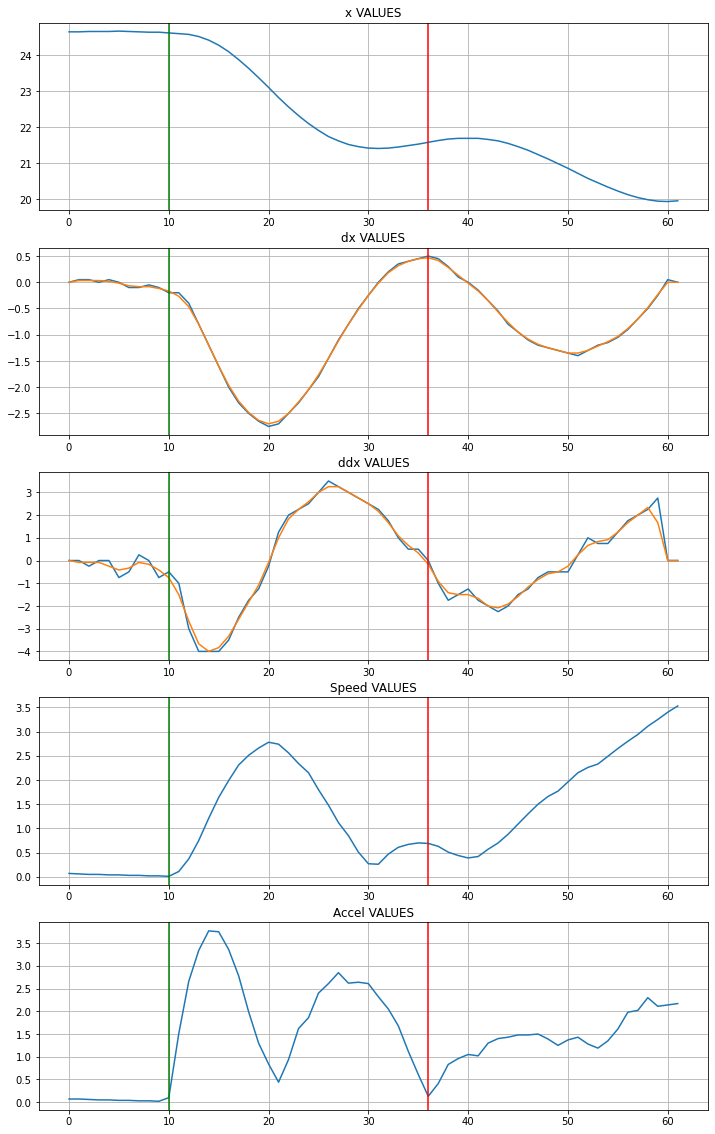

In [31]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(12,20))

ax1.set_title("x VALUES")
ax1.plot(x)

ax2.set_title("dx VALUES")
ax2.plot(dx)
ax2.plot(filt_dx)

ax3.set_title("ddx VALUES")
ax3.plot(ddx)
ax3.plot(filt_ddx)

ax4.set_title("Speed VALUES")
ax4.plot(state['s'].values)

ax5.set_title("Accel VALUES")
ax5.plot(state['a'].values)

for ax in (ax1,ax2,ax3,ax4,ax5):
    ax.grid()
    ax.axvline(play.events['ball_snap']-1,color='g')
    ax.axvline(play.events['pass_forward']-1,color='r')

plt.show()

In [32]:
start = play.events['ball_snap'] - 1
end = play.events['pass_forward']

In [33]:
peak_dropback = np.argmin(filt_dx[start:end]) + start
peak_dropback

20

In [34]:
start = peak_dropback
end = play.events['pass_forward']

In [35]:
end_dropback = np.argmax(filt_ddx[start:end]) + start
end_dropback

26

In [36]:
play.find_dropback_events()

In [37]:
play.events

{'ball_snap': 11,
 'pass_forward': 37,
 'pass_arrived': 55,
 'pass_outcome_caught': 58,
 'tackle': 61,
 'peak_dropback': 21,
 'end_dropback': 27}